In [2]:
#import important libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
#import data
data =pd.read_csv(r'E:/methodolgy/archive/walmart-sales-dataset-of-45stores.csv')
#format date
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
pd.set_option('display.max_rows', 450)
#create Month and year columns to use in display
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

In [4]:
#display data
data.head(50)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,3,2010
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,3,2010
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,3,2010
8,1,2010-04-02,1594968.28,0,62.27,2.719,210.820450,7.808,4,2010
9,1,2010-04-09,1545418.53,0,65.86,2.770,210.622857,7.808,4,2010


In [5]:
#clean data
print(data.isnull().sum().sum())
df=data[data.duplicated()]
df
#There is no null or duplicated values so we donot need to do any clean

0


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year


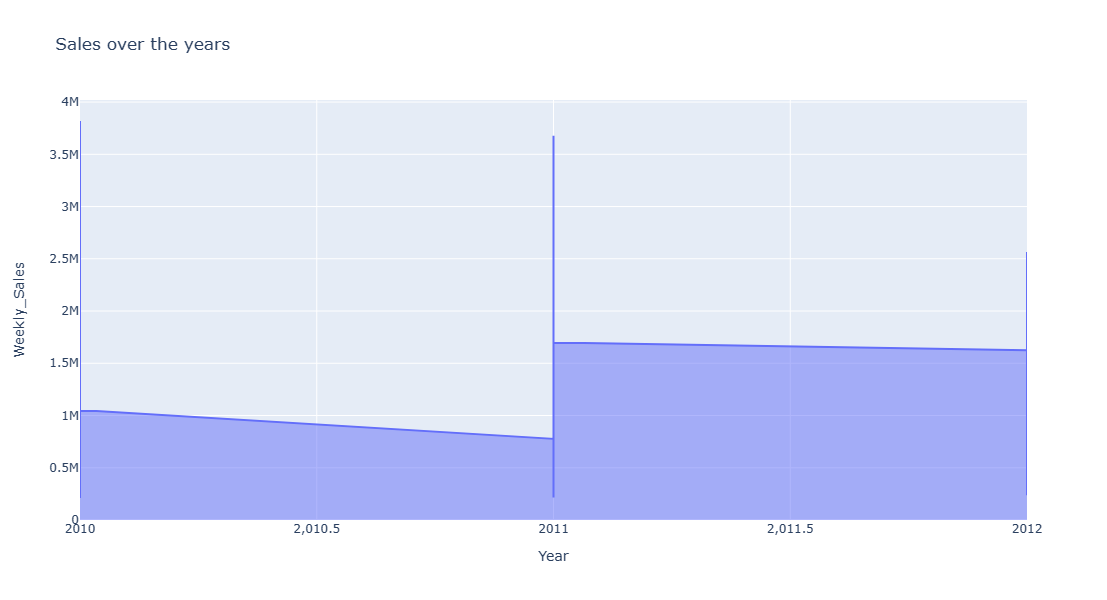

In [11]:
fig=px.area(data_sorted,x='Year',y='Weekly_Sales',title='Sales over the years',labels={'Year':'Year','Weekly_Sales':'Weekly_Sales'})
fig.update_layout(width=1100, height=600)
fig.show()

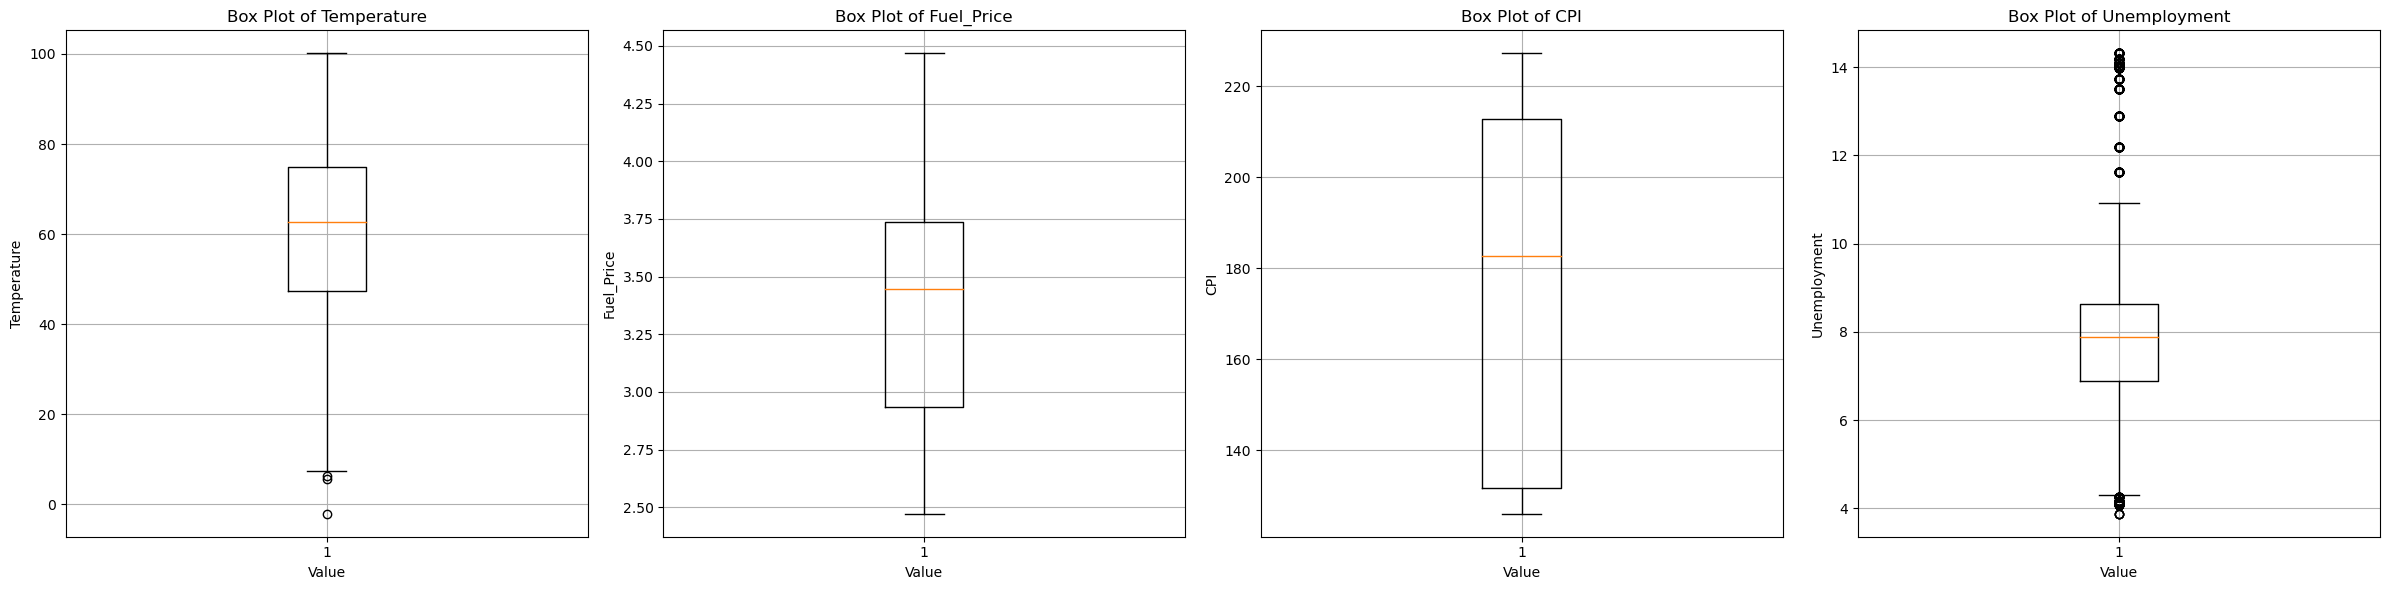

In [33]:
#use box plot to display outlayers in data
numeric_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
fig, axs = plt.subplots(1,  len(numeric_features), figsize=(6*len(numeric_features), 6))
for i, feature in enumerate(numeric_features):
    axs[i].boxplot(data[feature])
    axs[i].set_title(f'Box Plot of {feature}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel(feature)
    axs[i].grid(True)
plt.tight_layout()
plt.show()

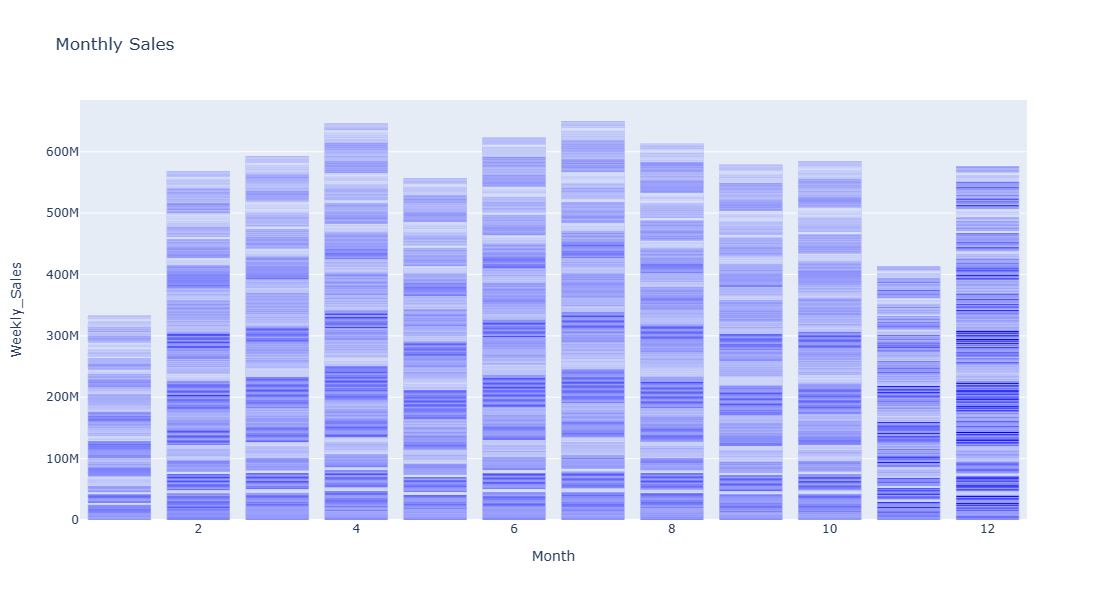

In [22]:
#display relation between sales and moonths useing bar plot
fig=px.bar(x=data['Month'],y=data['Weekly_Sales'],title='Monthly Sales',color_discrete_sequence=['blue'])
fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Weekly_Sales')
fig.update_layout(width=1100,height=600)
fig.show()

In [8]:
#A. Which store has maximum sales?
weeklysales=data.groupby(["Store"])['Weekly_Sales'].sum().round().sort_values(ascending=False)
weeklysales.head(1)

Store
20    301397792.0
Name: Weekly_Sales, dtype: float64

In [9]:
#B. Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation.
standard_dev=data.groupby(["Store"])['Weekly_Sales'].agg("std").sort_values(ascending=False)
standard_dev.head(1)

Store
14    317569.949476
Name: Weekly_Sales, dtype: float64

In [10]:
#D. Some holidays have a negative impact on sales. Find out holidays that have higher sales than the mean sales in the non-holiday season for all stores together.
#first we need ti=o know all holidayes date in our data
holidays_sales=data.loc[data["Holiday_Flag"]==1,'Date']
pd.DataFrame(holidays_sales).drop_duplicates()

,Date
1,2010-02-12
31,2010-09-10
42,2010-11-26
47,2010-12-31
53,2011-02-11
83,2011-09-09
94,2011-11-25
99,2011-12-30
105,2012-02-10
135,2012-09-07


In [11]:
#divide holidays date
faburay_holidays=['2010-02-12','2012-02-10','2011-02-11']
november_holidays=['2011-11-25','2010-11-26']
september_holidays=['2010-09-10','2011-09-09','2012-09-07']
december_holidays=['2011-12-30','2010-12-31']

In [12]:
#calaculate mean of each holidays months sales
feburayholidayes_sales=data[data['Date'].isin(faburay_holidays)]['Weekly_Sales'].mean()
novemberholidayes_sales=data[data['Date'].isin(november_holidays)]['Weekly_Sales'].mean()
septemberholidayes_sales=data[data['Date'].isin(september_holidays)]['Weekly_Sales'].mean()
decemberholidayes_sales=data[data['Date'].isin(december_holidays)]['Weekly_Sales'].mean()
sales=[feburayholidayes_sales,novemberholidayes_sales,septemberholidayes_sales,decemberholidayes_sales]
sales

[1079127.9877037038, 1471273.427777778, 1042427.293925926, 960833.1115555555]

In [13]:
#calculate mean of nonholiday sales 
notholidays_sales=data[data["Holiday_Flag"]==0]['Weekly_Sales'].mean()
notholidays_sales

1041256.3802088555

In [14]:
#store results in data frame 
sales = {
    'notholidays_sales': notholidays_sales,
    'feburayholidayes_sales': feburayholidayes_sales,
    'novemberholidayes_sales': novemberholidayes_sales,
    'septemberholidayes_sales': septemberholidayes_sales,
    'decemberholidayes_sales': decemberholidayes_sales
}

sorted_sales = dict(sorted(sales.items(), key=lambda item: item[1], reverse=True))
sortedsales=pd.DataFrame([sorted_sales]).T
sortedsales

,0
novemberholidayes_sales,1.471273e+06
feburayholidayes_sales,1.079128e+06
septemberholidayes_sales,1.042427e+06
notholidays_sales,1.041256e+06
decemberholidayes_sales,9.608331e+05


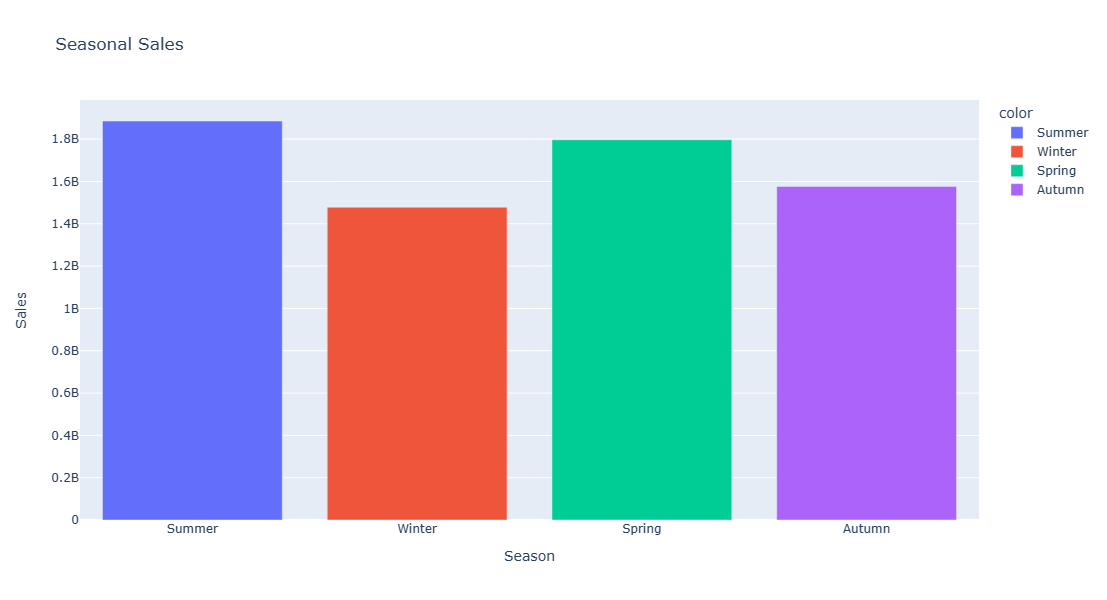

In [26]:
# display the relation between sales and seasons
summer = data[data['Month'].isin([6, 7, 8])]
winter = data[data['Month'].isin([12, 1, 2])]
spring = data[data['Month'].isin([3, 4, 5])]
autumn = data[data['Month'].isin([9, 10, 11])]
seasons = ['Summer', 'Winter', 'Spring', 'Autumn']
total_sales = [summer['Weekly_Sales'].sum(), winter['Weekly_Sales'].sum(), spring['Weekly_Sales'].sum(), autumn['Weekly_Sales'].sum()]
fig = px.bar(x=seasons, y=total_sales, color=seasons, orientation='v', title='Seasonal Sales')
fig.update_xaxes(title_text='Season')
fig.update_yaxes(title_text='Sales')
fig.update_layout(width=1100,height=600)
fig.show()

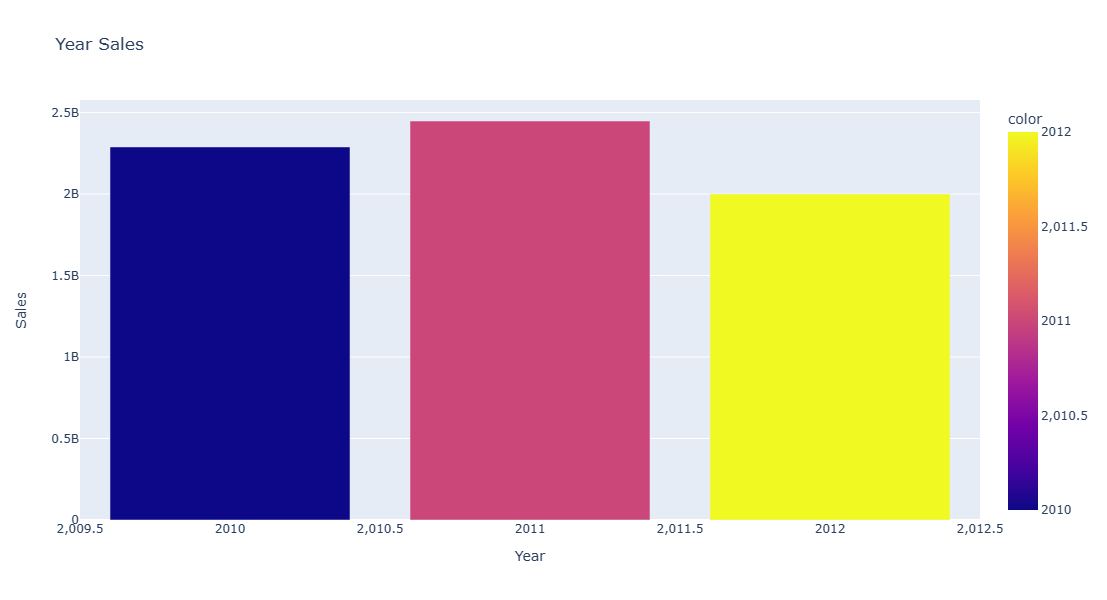

In [30]:
#dislapy the relation between sales and years using bar plot
yearly_sales = data.groupby('Year')['Weekly_Sales'].sum()
yearly_sales=pd.DataFrame({'Year':yearly_sales.index,'Sales':yearly_sales.values})
fig = px.bar(x=yearly_sales["Year"], y=yearly_sales['Sales'], color=yearly_sales["Year"], orientation='v', title='Year Sales')
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Sales')
fig.update_layout(width=1100,height=600)
fig.show()

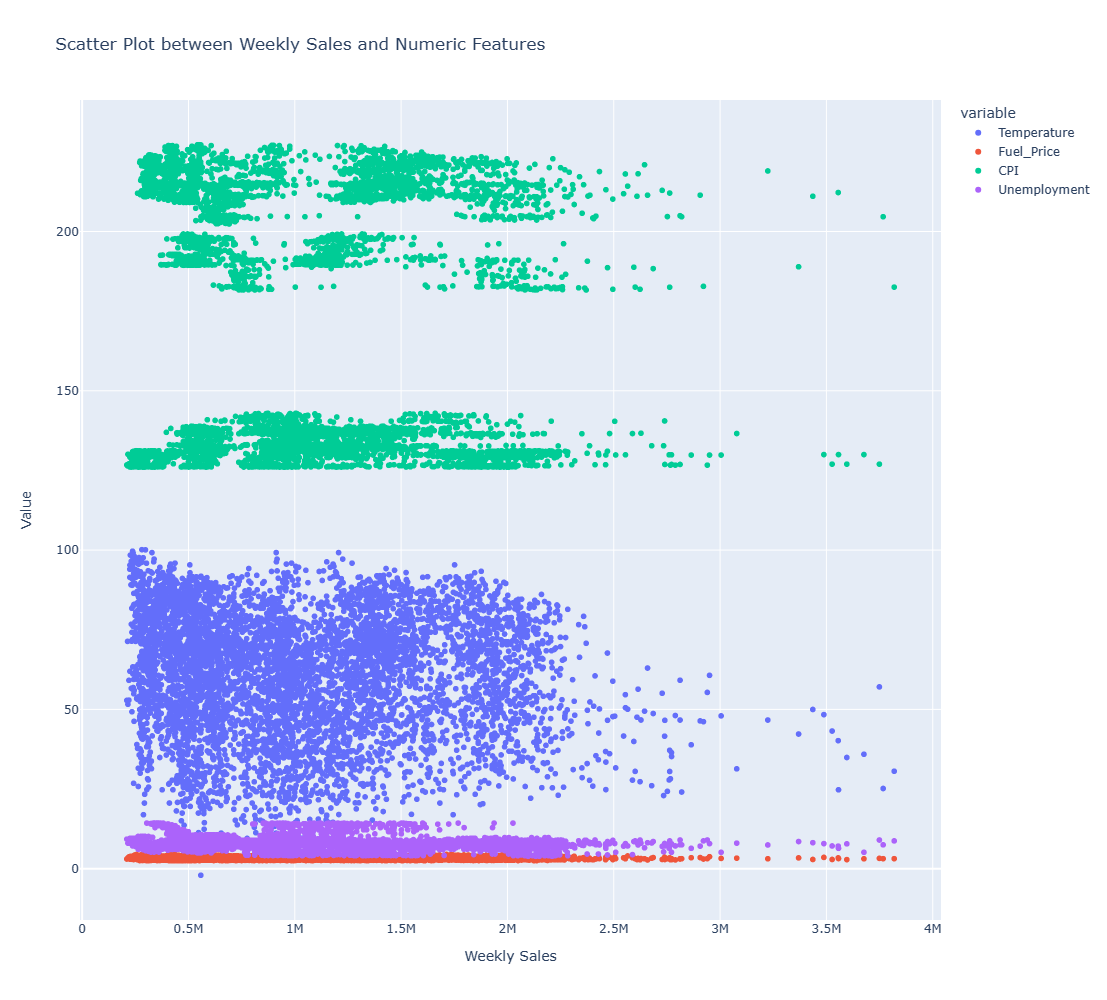

In [37]:
#display the relation between weeklysales and all numirce_futures
numeric_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
fig = px.scatter(data, x='Weekly_Sales', y=numeric_features, title='Scatter Plot between Weekly Sales and Numeric Features')
fig.update_layout(xaxis_title='Weekly Sales', yaxis_title='Value',height=1000)
fig.show()